## Import the Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

from shutil import copy, move
from glob import glob as g
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

from torch.optim import lr_scheduler 
import time
import matplotlib.pyplot as plt

import copy

from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import datasets, models, transforms
from torchvision.models import resnet18

## Initialization

In [3]:
batch_size =64

num_class =10
num_epochs=20

device = 'cuda' if torch.cuda.is_available() else 'cpu'

val_loss = []
train_loss = []
val_acc = []
train_acc = []

## Dataset

In [4]:
train_cane_dir = '../Output/dataset/training/cane'
train_cavallo_dir = '../Output/dataset/training/cavallo'
train_elefante_dir = '../Output/dataset/training/elefante'
train_gallina_dir = '../Output/dataset/training/gallina'
train_gatto_dir = '../Output/dataset/training/gatto'
train_mucca_dir = '../Output/dataset/training/mucca'
train_pecora_dir = '../Output/dataset/training/pecora'
train_ragno_dir = '../Output/dataset/training/ragno'
train_scoiattolo_dir = '../Output/dataset/training/scoiattolo'
train_farfalla_dir = '../Output/dataset/training/farfalla'

test_cane_dir = '../Output/dataset/test/cane'
test_cavallo_dir = '../Output/dataset/test/cavallo'
test_elefante_dir = '../Output/dataset/test/elefante'
test_gallina_dir = '../Output/dataset/test/gallina'
test_gatto_dir = '../Output/dataset/test/gatto'
test_mucca_dir = '../Output/dataset/test/mucca'
test_pecora_dir = '../Output/dataset/test/pecora'
test_ragno_dir = '../Output/dataset/test/ragno'
test_scoiattolo_dir = '../Output/dataset/test/scoiattolo'
test_farfalla_dir = '../Output/dataset/test/farfalla'
to_create = [
    train_cane_dir ,
    train_cavallo_dir ,
    train_elefante_dir ,
    train_gallina_dir,
    train_gatto_dir,
    train_mucca_dir ,
    train_pecora_dir,
    train_ragno_dir,
    train_scoiattolo_dir,
    train_farfalla_dir,
    test_cane_dir,
    test_cavallo_dir,
    test_elefante_dir,
    test_gallina_dir ,
    test_gatto_dir ,
    test_mucca_dir ,
    test_pecora_dir ,
    test_ragno_dir,
    test_scoiattolo_dir,
    test_farfalla_dir
]
for dir in to_create:
    os.makedirs(dir,exist_ok=True)

In [5]:
all_cane = sorted(g("../input/animals10/raw-img/cane/*"))
all_cavallo = sorted(g("../input/animals10/raw-img/cavallo/*"))
all_elefante = sorted(g("../input/animals10/raw-img/elefante/*"))
all_farfalla= sorted(g("../input/animals10/raw-img/farfalla/*"))
all_gallina= sorted(g("../input/animals10/raw-img/gallina/*"))
all_gatto = sorted(g("../input/animals10/raw-img/gatto/*"))
all_mucca= sorted(g("../input/animals10/raw-img/mucca/*"))
all_pecora = sorted(g("../input/animals10/raw-img/pecora/*"))
all_ragno= sorted(g("../input/animals10/raw-img/ragno/*"))
all_scoiattolo= sorted(g("../input/animals10/raw-img/scoiattolo/*"))

In [6]:
print(len(all_cane))
print(len(all_cavallo))
print(len(all_elefante))
print(len(all_farfalla))
print(len(all_gallina))
print(len(all_gatto))
print(len(all_mucca))
print(len(all_pecora))
print(len(all_ragno))
print(len(all_scoiattolo))

4863
2623
1446
2112
3098
1668
1866
1820
4821
1862


In [7]:
cane_train, cane_test = train_test_split(all_cane, test_size = 0.2, random_state = 101, shuffle = True)

cavallo_train, cavallo_test = train_test_split(all_cavallo, test_size = 0.2, random_state = 101, shuffle = True)

elefante_train, elefante_test = train_test_split(all_elefante, test_size = 0.2, random_state = 101, shuffle = True)

farfalla_train, farfalla_test = train_test_split(all_farfalla, test_size = 0.2, random_state = 101, shuffle = True)

gallina_train, gallina_test = train_test_split(all_gallina, test_size = 0.2, random_state = 101, shuffle = True)

gatto_train, gatto_test = train_test_split(all_gatto, test_size = 0.2, random_state = 101, shuffle = True)

mucca_train, mucca_test = train_test_split(all_mucca, test_size = 0.2, random_state = 101, shuffle = True)

pecora_train, pecora_test = train_test_split(all_pecora, test_size = 0.2, random_state = 101, shuffle = True)

ragno_train, ragno_test = train_test_split(all_ragno, test_size = 0.2, random_state = 101, shuffle = True)

scoiattolo_train,scoiattolo_test = train_test_split(all_scoiattolo, test_size = 0.2, random_state = 101, shuffle = True)

In [8]:
from shutil import copy, move
for name in tqdm(cane_train):
    copy(name , os.path.join(train_cane_dir , name.split('/')[-1]))
    
for name in tqdm(cavallo_train):
    copy(name , os.path.join(train_cavallo_dir , name.split('/')[-1]))
    
for name in tqdm(elefante_train):
    copy(name , os.path.join(train_elefante_dir , name.split('/')[-1]))
    
for name in tqdm(gallina_train):
    copy(name , os.path.join(train_gallina_dir , name.split('/')[-1]))
    
for name in tqdm(gatto_train):
    copy(name , os.path.join(train_gatto_dir , name.split('/')[-1]))
    
for name in tqdm(mucca_train):
    copy(name , os.path.join(train_mucca_dir , name.split('/')[-1]))
    
for name in tqdm(pecora_train):
    copy(name , os.path.join(train_pecora_dir , name.split('/')[-1]))
    
for name in tqdm(ragno_train):
    copy(name , os.path.join(train_ragno_dir , name.split('/')[-1]))
    
for name in tqdm(farfalla_train):
    copy(name , os.path.join(train_farfalla_dir , name.split('/')[-1]))
    
for name in tqdm(scoiattolo_train):
    copy(name , os.path.join(train_scoiattolo_dir , name.split('/')[-1]))

  0%|          | 0/3890 [00:00<?, ?it/s]

  0%|          | 0/2098 [00:00<?, ?it/s]

  0%|          | 0/1156 [00:00<?, ?it/s]

  0%|          | 0/2478 [00:00<?, ?it/s]

  0%|          | 0/1334 [00:00<?, ?it/s]

  0%|          | 0/1492 [00:00<?, ?it/s]

  0%|          | 0/1456 [00:00<?, ?it/s]

  0%|          | 0/3856 [00:00<?, ?it/s]

  0%|          | 0/1689 [00:00<?, ?it/s]

  0%|          | 0/1489 [00:00<?, ?it/s]

In [9]:
print(len(os.listdir(train_cane_dir)))
print(len(os.listdir(train_cavallo_dir)))
print(len(os.listdir(train_elefante_dir)))
print(len(os.listdir(train_gallina_dir)))
print(len(os.listdir(train_gatto_dir)))
print(len(os.listdir(train_mucca_dir)))
print(len(os.listdir(train_pecora_dir)))
print(len(os.listdir(train_ragno_dir)))
print(len(os.listdir(train_scoiattolo_dir)))
print(len(os.listdir(train_farfalla_dir)))

3890
2098
1156
2478
1334
1492
1456
3856
1489
1689


In [10]:
for name in tqdm(cane_test):
    copy(name , os.path.join(test_cane_dir , name.split('/')[-1]))
    
for name in tqdm(cavallo_test):
    copy(name , os.path.join(test_cavallo_dir , name.split('/')[-1]))
    
for name in tqdm(elefante_test):
    copy(name , os.path.join(test_elefante_dir , name.split('/')[-1]))
    
for name in tqdm(gallina_test):
    copy(name , os.path.join(test_gallina_dir , name.split('/')[-1]))
    
for name in tqdm(gatto_test):
    copy(name , os.path.join(test_gatto_dir , name.split('/')[-1]))
    
for name in tqdm(mucca_test):
    copy(name , os.path.join(test_mucca_dir , name.split('/')[-1]))
    
for name in tqdm(pecora_test):
    copy(name , os.path.join(test_pecora_dir , name.split('/')[-1]))
    
for name in tqdm(ragno_test):
    copy(name , os.path.join(test_ragno_dir , name.split('/')[-1]))
    
for name in tqdm(farfalla_test):
    copy(name , os.path.join(test_farfalla_dir , name.split('/')[-1]))
    
for name in tqdm(scoiattolo_test):
    copy(name , os.path.join(test_scoiattolo_dir , name.split('/')[-1]))

  0%|          | 0/973 [00:00<?, ?it/s]

  0%|          | 0/525 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/620 [00:00<?, ?it/s]

  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/374 [00:00<?, ?it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

  0%|          | 0/373 [00:00<?, ?it/s]

In [11]:
print(len(os.listdir(test_cane_dir)))
print(len(os.listdir(test_cavallo_dir)))
print(len(os.listdir(test_elefante_dir)))
print(len(os.listdir(test_gallina_dir)))
print(len(os.listdir(test_gatto_dir)))
print(len(os.listdir(test_mucca_dir)))
print(len(os.listdir(test_pecora_dir)))
print(len(os.listdir(test_ragno_dir)))
print(len(os.listdir(test_scoiattolo_dir)))
print(len(os.listdir(test_farfalla_dir)))

973
525
290
620
334
374
364
965
373
423


In [12]:
train_dir = '../Output/dataset/training'
test_dir = '../Output/dataset/test'

In [14]:
transform = torchvision.transforms.Compose([transforms.Resize((150,150)),
                                            transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(root=train_dir,transform=transform)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=64)

def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in dataloader:
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum / num_batches

    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
    
    std=std.tolist()
    mean=mean.tolist()
    
    return mean, std

mean, std=get_mean_and_std(train_dataloader)

In [15]:
print(f"mean:{mean},std:{std}")

mean:[0.5179441571235657, 0.5002516508102417, 0.41238734126091003],std:[0.2625972032546997, 0.2575567364692688, 0.27541598677635193]


## Set Up DataLoaders

In [16]:
def get_data_loader(data_dir, batch_size,mean,std ,train = True):
    """
    Define the way we compose the batch dataset including the augmentation for increasing the number of data
    and return the augmented batch-dataset
    :param data_dir: root directory where the either train or test dataset is
    :param batch_size: size of the batch
    :param train: true if current phase is training, else false
    :return: augmented batch dataset
    """

    transform = {
        'train': transforms.Compose([
            transforms.Resize([224,224]), 
            transforms.RandomHorizontalFlip(), 
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ]),
        'test': transforms.Compose([
            transforms.Resize([224,224]),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
    }

    data = torchvision.datasets.ImageFolder(root=data_dir, transform=transform['train'] if train else 'test')
    data_loader = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size, shuffle=True, num_workers=4)

    return data_loader

In [17]:
train_dir = '../Output/dataset/training'
test_dir = '../Output/dataset/test'

train_loader = get_data_loader(train_dir,batch_size,mean,std)
test_loader = get_data_loader(test_dir,batch_size,mean,std)

In [18]:
train_loader_size = 0

for image , labels in train_loader:
    train_loader_size += image.shape[0]
    
print(train_loader_size)

20938


In [19]:
test_loader_size = 0
.
for image , labels in test_loader:
    test_loader_size+=image.shape[0]
    
print(test_loader_size)

5241


## Set Up Model

In [20]:
net = resnet18(pretrained=False)
net.fc = nn.Linear(512, 10)
net = net.to(device)

In [21]:
def count_parameters(model):
    params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return params/1000000

In [22]:
count_parameters(net)

11.181642

## Set Up Optimizer and Criterion (Loss)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 
                            lr=0.01,
                            momentum=0.9, 
                            weight_decay=5e-4)

## Training the Model

In [25]:
import copy

def train_model(model, dataloaders,riterion, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train',"val"]:
            if phase == 'train':
                model.train()  
            else:
                model.eval()  

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss /dataloaders_size[phase]
            epoch_acc = running_corrects.double() /dataloaders_size[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            info_loss_plot[phase].append(round(epoch_loss,4))
            info_acc_plot[phase].append(round(epoch_acc.item(),4))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts =copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    
    return model

In [26]:
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

dataloaders_dict={"train":train_loader,"val":test_loader}
dataloaders_size={"train":train_loader_size,"val":test_loader_size}
info_loss_plot={"train":train_loss,"val":val_loss }
info_acc_plot={"train":train_acc,"val":val_acc}

In [27]:
model_ft= train_model(net, dataloaders_dict, criterion, exp_lr_scheduler, num_epochs=num_epochs)

Epoch 0/19
----------
train Loss: 1.7526 Acc: 0.3919
val Loss: 1.5708 Acc: 0.4701

Epoch 1/19
----------
train Loss: 1.2364 Acc: 0.5750
val Loss: 1.1699 Acc: 0.6026

Epoch 2/19
----------
train Loss: 1.0145 Acc: 0.6496
val Loss: 1.1758 Acc: 0.6155

Epoch 3/19
----------
train Loss: 0.8845 Acc: 0.7016
val Loss: 1.0223 Acc: 0.6546

Epoch 4/19
----------
train Loss: 0.7594 Acc: 0.7427
val Loss: 1.3459 Acc: 0.6346

Epoch 5/19
----------
train Loss: 0.6623 Acc: 0.7752
val Loss: 1.0128 Acc: 0.6812

Epoch 6/19
----------
train Loss: 0.5737 Acc: 0.8057
val Loss: 0.8406 Acc: 0.7252

Epoch 7/19
----------
train Loss: 0.3358 Acc: 0.8961
val Loss: 0.5722 Acc: 0.8113

Epoch 8/19
----------
train Loss: 0.2771 Acc: 0.9176
val Loss: 0.5659 Acc: 0.8166

Epoch 9/19
----------
train Loss: 0.2435 Acc: 0.9284
val Loss: 0.5501 Acc: 0.8250

Epoch 10/19
----------
train Loss: 0.2140 Acc: 0.9390
val Loss: 0.5534 Acc: 0.8254

Epoch 11/19
----------
train Loss: 0.1915 Acc: 0.9459
val Loss: 0.5506 Acc: 0.8268

Ep

## Plot Loss and Accuracy Curves

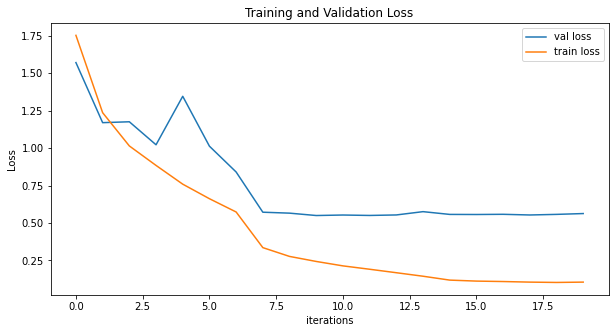

In [28]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_loss,label="val loss")
plt.plot(train_loss,label="train loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

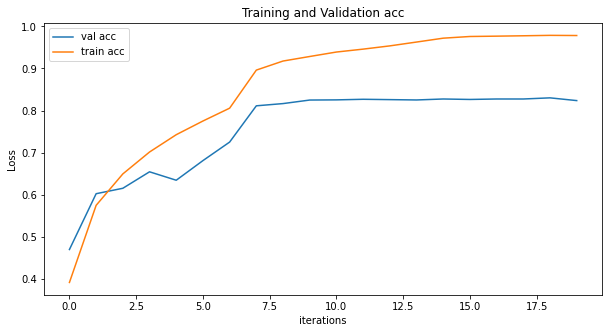

In [29]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation acc")
plt.plot(val_acc,label="val acc")
plt.plot(train_acc,label="train acc")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()